# Project : Writing a Data Scientist Blog Post

# 1. Business Understanding

### 1.1 Goal: Answer 3 business-related questions using the Stack Overflow 2017 Survey dataset.

### 1.2 Chosen Questions:
* What are the most popular programming languages among different experience levels?
* What factors influence developer job satisfaction?
* What factors contribute to developer career satisfaction?

# 2. Data Understanding
### 2.1 Dataset: Stack Overflow 2017 Survey data
Link: https://www.kaggle.com/datasets/stackoverflow/so-survey-2017

### 2.2 Attributes Overview: 
We will use the following columns from the dataset:

* YearsProgram: Developer programming experience.
* HaveWorkedLanguage: Languages developers have worked with.
* JobSatisfaction: Developers’ satisfaction with their jobs.
* CareerSatisfaction: Satisfaction with their overall career.
* FormalEducation: Developers' education level.
* Country: Developers' country of residence.
* DeveloperType: Types of developer roles they have worked in.


## 2.3: Gather the Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import sys
import os
# Get the path to the parent directory and add it to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
import AllTogether as t
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('../data/survey_results_public.csv')

# Show basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Exploration
Before we clean the data, let's perform some basic exploration to understand the distribution of key features and to get an initial sense of the dataset.

## 3.1 Summary Statistics:

In [2]:
# Summary statistics for numerical columns
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


## 3.2 Distribution of Programming Experience:

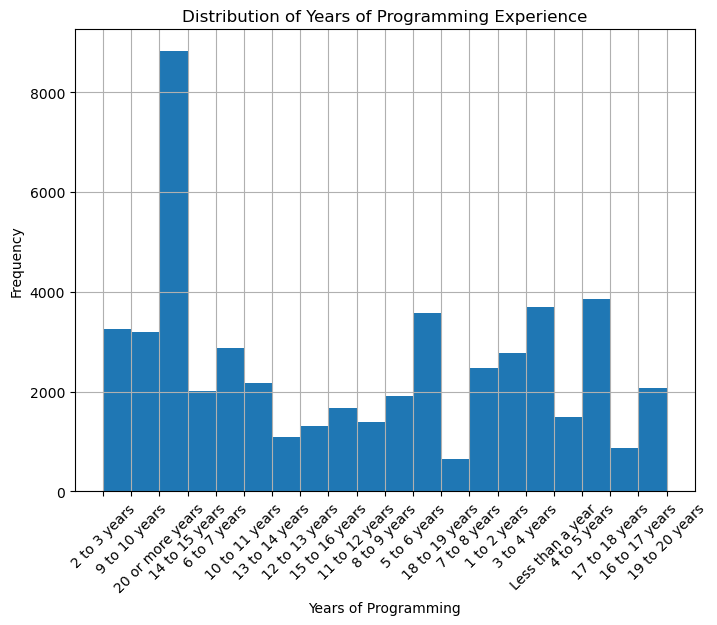

In [3]:
plt.figure(figsize=(8, 6))
#df['YearsProgram'].dropna().hist(bins=20, color='skyblue')
df['YearsProgram'].dropna().hist(bins=20)
plt.title('Distribution of Years of Programming Experience')
plt.xlabel('Years of Programming')
plt.ylabel('Frequency')

# Tilt x-axis labels
plt.xticks(rotation=45)

plt.show()

## 3.3 Top 10 Countries by Respondent Count:

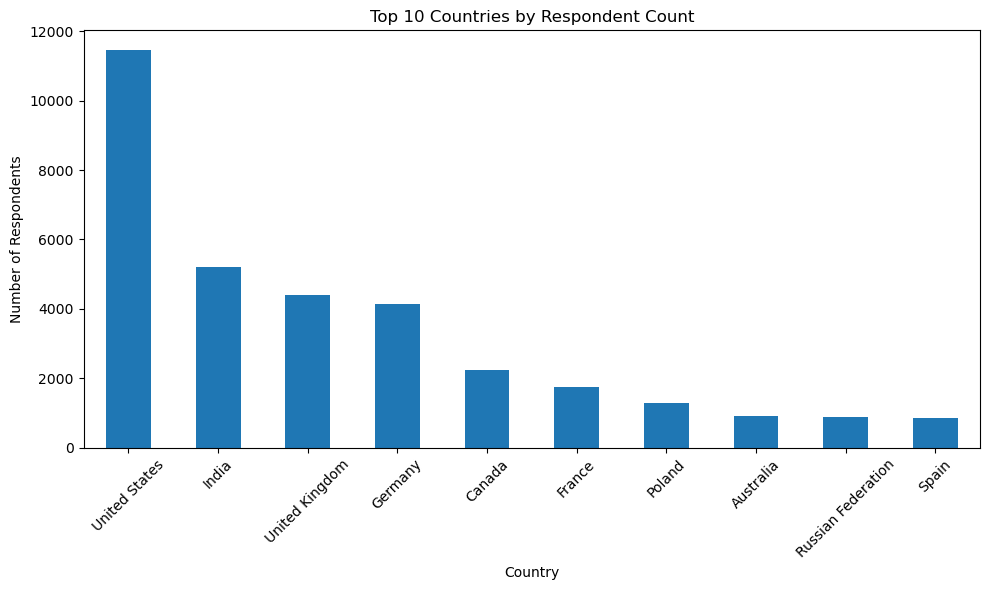

In [4]:
plt.figure(figsize=(10, 6))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')

# Tilt x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# 4. Data Preparation
We will now prepare the data by handling missing values and cleaning the dataset.
Here's how we'll proceed for each step.

We’ll clean the data by addressing missing values and focusing on relevant columns.

## 4.1 Handle Missing Values:
* Drop columns with more than 70% missing values (increased from 50% due to significant missing data).
* Fill in missing values where appropriate.

In [5]:
# Drop columns with more than 70% missing values
df_cleaned = df.dropna(thresh=len(df) * 0.7, axis=1)

# Check for remaining missing values
df_cleaned.isnull().sum()

Respondent                       0
Professional                     0
ProgramHobby                     0
Country                          0
University                       0
EmploymentStatus                 0
FormalEducation                  0
MajorUndergrad                8551
HomeRemote                    7384
CompanySize                  12470
CompanyType                  12569
YearsProgram                   247
YearsCodedJob                10502
DeveloperType                15267
CareerSatisfaction            8697
JobSatisfaction              11016
PronounceGIF                   384
ClickyKeys                    9346
TabsSpaces                   12541
WorkStart                    14696
HaveWorkedLanguage           14767
AuditoryEnvironment          14935
StackOverflowDescribes       14460
StackOverflowSatisfaction    14800
dtype: int64

## 4.2 Select Relevant Columns: 
We will focus on columns needed to answer our questions. This will make the dataset easier to manage.

In [6]:
# Columns of interest
columns_of_interest = [
    'YearsProgram',       # Coding experience (instead of YearsCoding)
    'HaveWorkedLanguage', # Languages worked with
    'JobSatisfaction',    # Job satisfaction level
    'CareerSatisfaction', # Career satisfaction level
    'FormalEducation',    # Education level
    'Country',            # Country of residence
    'DeveloperType'       # Developer type
]

# Select only relevant columns
df_cleaned = df_cleaned[columns_of_interest]

# Drop rows with missing values in critical columns like 'JobSatisfaction'
df_cleaned.dropna(subset=['JobSatisfaction'], inplace=True)

# Check for remaining missing values
df_cleaned.isnull().sum()

YearsProgram            110
HaveWorkedLanguage    10034
JobSatisfaction           0
CareerSatisfaction       24
FormalEducation           0
Country                   0
DeveloperType          5420
dtype: int64

# 5. Data Analysis & Modeling
We will now analyze the data based on the three business-related questions.

## 5.1 Question 1: 
## What are the most popular programming languages among different experience levels?
We will analyze which programming languages are most commonly used by developers with varying experience levels.

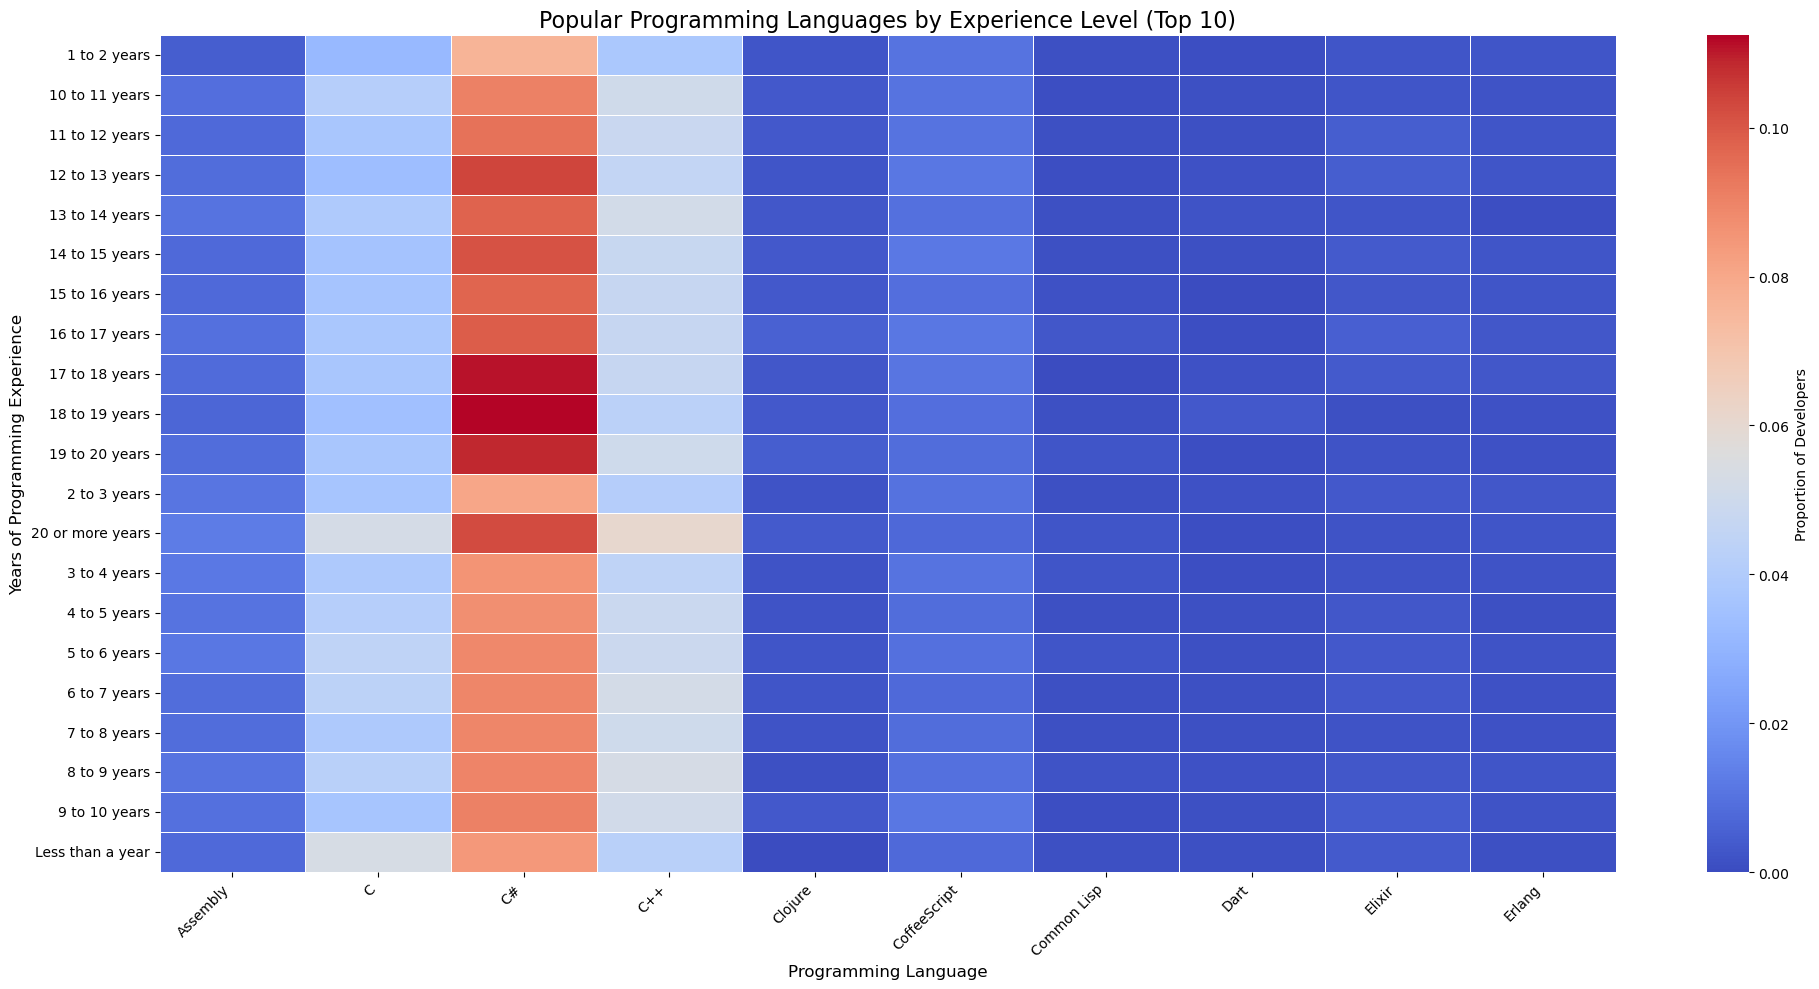

In [7]:
# Split 'HaveWorkedLanguage' into individual languages
df_lang_exp = df_cleaned[['YearsProgram', 'HaveWorkedLanguage']].dropna()
df_lang_exp['HaveWorkedLanguage'] = df_lang_exp['HaveWorkedLanguage'].str.split('; ')
df_lang_exp = df_lang_exp.explode('HaveWorkedLanguage')

# Count occurrences of each language by experience level
lang_by_exp = df_lang_exp.groupby('YearsProgram')['HaveWorkedLanguage'].value_counts().unstack().fillna(0)

# Normalize the counts by experience level
lang_by_exp = lang_by_exp.div(lang_by_exp.sum(axis=1), axis=0)

# Plot heatmap for normalized proportions
plt.figure(figsize=(20, 10))
sns.heatmap(lang_by_exp.loc[:, lang_by_exp.columns[:10]], cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Proportion of Developers'})

# Improve readability of labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Popular Programming Languages by Experience Level (Top 10)', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Years of Programming Experience', fontsize=12)
plt.tight_layout()
plt.show()

## 5.2 Question 2: 
## What factors influence developer job satisfaction?
We will investigate how factors such as career satisfaction impact job satisfaction.

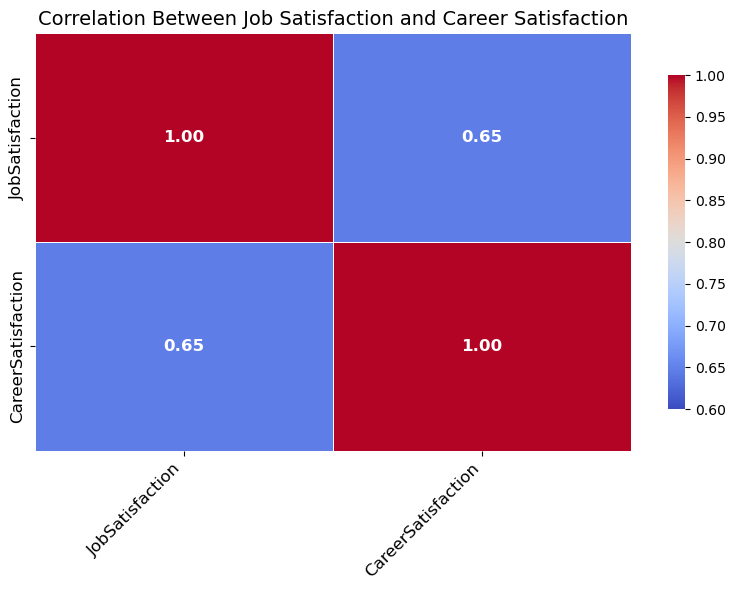

In [8]:
# Analyze correlations between job satisfaction and career satisfaction
# Ensure no missing values before calculating correlation
df_satisfaction_cleaned = df_cleaned[['JobSatisfaction', 'CareerSatisfaction']].dropna()

# Compute the correlation matrix
correlation_matrix = df_satisfaction_cleaned.corr()

# Plot the full correlation matrix without masking
plt.figure(figsize=(8, 6))

# Updated heatmap settings
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            vmin=0.6, vmax=1, linewidths=0.5, linecolor='white', 
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 12, "weight": "bold"})

plt.title('Correlation Between Job Satisfaction and Career Satisfaction', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

## 5.3 Question 3: 
## What factors contribute to developer career satisfaction?
Since "Salary" data is not available, we will analyze how factors like education level, country, and experience contribute to career satisfaction.

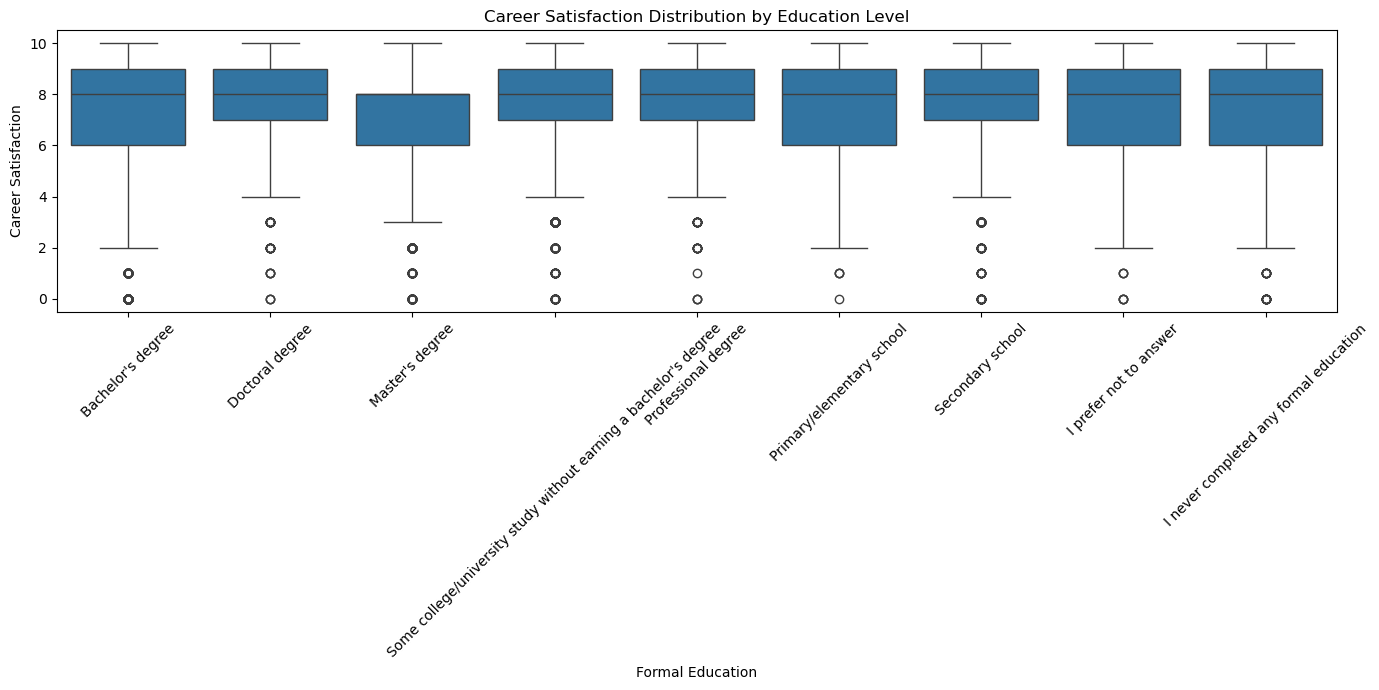

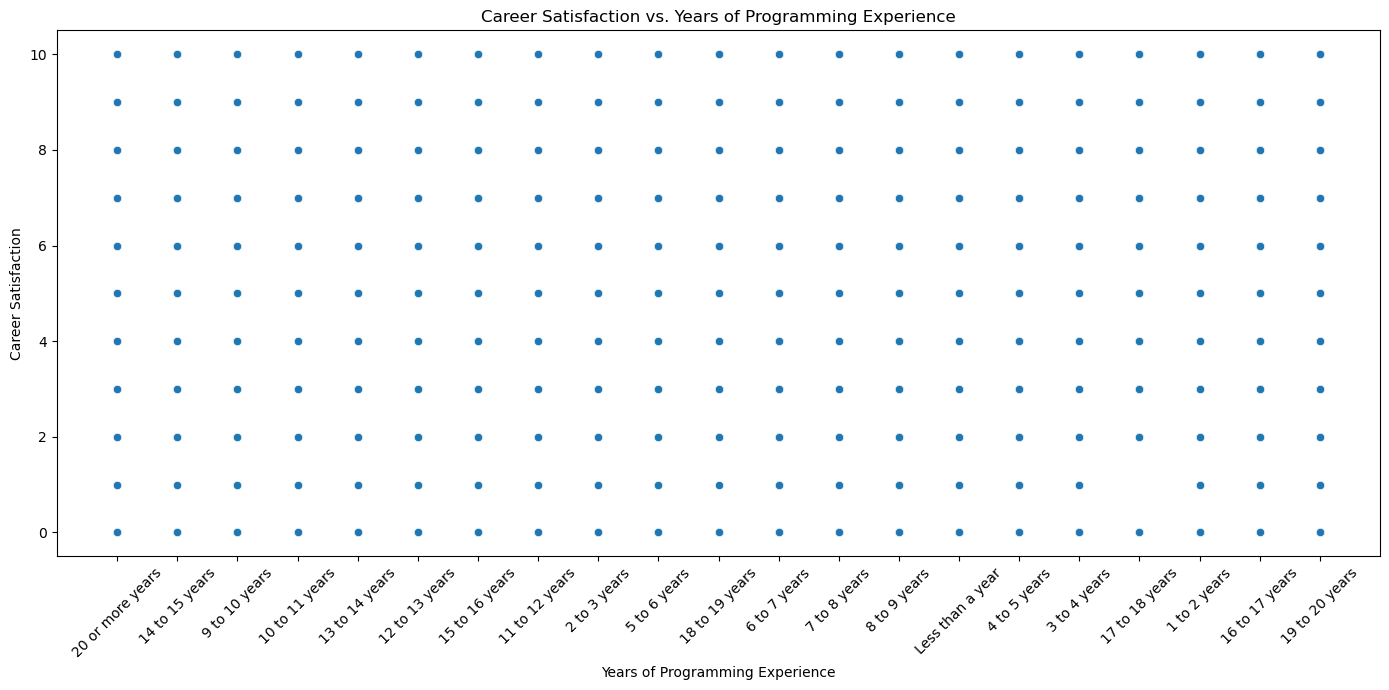

In [9]:
# Analyze career satisfaction distribution by education level
df_career_satisfaction = df_cleaned[['CareerSatisfaction', 'FormalEducation', 'YearsProgram', 'Country']]

# Visualize career satisfaction distribution by education level
plt.figure(figsize=(14, 7))  # Adjusted figure size for better visibility
sns.boxplot(x='FormalEducation', y='CareerSatisfaction', data=df_career_satisfaction)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title('Career Satisfaction Distribution by Education Level')
plt.xlabel('Formal Education')  # Optional: add xlabel for clarity
plt.ylabel('Career Satisfaction')  # Optional: add ylabel for clarity
plt.tight_layout()  # Adjust layout to make sure everything fits without clipping
plt.show()

# Explore relationship between years of programming and career satisfaction
plt.figure(figsize=(14, 7))  # Adjusted figure size to better spread out x-axis labels
sns.scatterplot(x='YearsProgram', y='CareerSatisfaction', data=df_career_satisfaction)
plt.xticks(rotation=45)  # Rotate x-axis labels to 90 degrees to prevent overlapping
plt.xlabel('Years of Programming Experience')  # Label the x-axis for clarity
plt.ylabel('Career Satisfaction')  # Label the y-axis for clarity
plt.title('Career Satisfaction vs. Years of Programming Experience')
plt.tight_layout()  # Ensure all labels and titles are clearly visible
plt.show()

# 6. Evaluation of Results
Summarize the findings from the analysis:

Popular Programming Languages by Experience: Summarize the language preferences across different experience levels.
Job Satisfaction Factors: Highlight key factors that contribute to job satisfaction, focusing on career satisfaction.
Career Satisfaction Insights: Explain how education, experience, and other factors contribute to overall career satisfaction.

## 6.1 Question 1 : Evaluation of Results :
## What are the most popular programming languages among different experience levels?

In this section, we evaluated the distribution of the most popular programming languages based on years of programming experience using a heatmap. The heatmap provides a clear visual representation of how developer preferences for languages vary by experience level.

From the heatmap, we observe the following:

* C and C++ are most commonly used by developers with 17+ years of experience, which reflects these languages’ long-standing presence in the industry.
* Other languages, like Assembly and Clojure, show relatively lower popularity across all experience levels, with their usage concentrated in more experienced developers (over 10+ years).
* Newer languages like CoffeeScript and Dart appear with very low adoption, especially in developers with fewer than 10 years of experience.
* The heatmap effectively shows how preferences shift with experience levels, providing valuable insights for businesses and hiring teams looking to target specific developer expertise.

  
This visualization helps reinforce the understanding of the developer landscape and informs decision-making for hiring and training.

## 6.2 Question 2 : Evaluation of Results :
## What factors influence developer job satisfaction?

Evaluation of Results for Question 2: Factors Influencing Developer Job Satisfaction

- Correlation Between Job and Career Satisfaction:

  - The heatmap reveals a significant positive correlation (0.65) between job satisfaction and career satisfaction among developers. This indicates that developers who are satisfied with their careers are likely to also express satisfaction with their jobs.
  - The correlation of 0.65 suggests a moderately strong relationship, which means that while career satisfaction contributes significantly to job satisfaction, there are also other factors at play that influence job satisfaction levels.
  - The heatmap effectively communicates the strength and direction of this relationship, making it easier for stakeholders, such as HR professionals and management, to understand the connection between these two aspects of satisfaction.

- Insights for Business and Stakeholders:

  - This finding highlights the importance of fostering both job and career satisfaction in workplace environments. Organizations could focus on career development programs, mentorship, and growth opportunities to improve overall job satisfaction.
  - The strong link between career and job satisfaction suggests that enhancing employees' perceptions of their overall career paths could directly improve their day-to-day job experiences, contributing to better retention and engagement.

- Limitations and Further Investigation:

  - While the correlation is strong, it does not imply causation. Further investigation could involve exploring other factors like work-life balance, compensation, and workplace culture that might also impact job satisfaction.
  - Future analyses could use more complex statistical techniques, such as regression modeling, to determine the relative importance of different factors contributing to job satisfaction.


This updated evaluation incorporates a clear understanding of the relationships derived from the heatmap and outlines actionable insights for decision-makers.

## 6.3 Question 3 : Evaluation of Results :
## What factors contribute to developer career satisfaction?


1. Career Satisfaction Distribution by Education Level:

    - The boxplot visualization indicates that the median career satisfaction levels are relatively consistent across different education levels, ranging from 7 to 8.
    - There's minimal variation in the interquartile ranges across educational qualifications, suggesting that higher education does not significantly elevate career satisfaction, although all levels display several outliers.
    - This result could imply that factors other than formal education might have a more pronounced impact on career satisfaction, such as work environment, job role, or personal expectations.
      

2. Career Satisfaction vs. Years of Programming Experience:

    - The scatterplot shows a wide distribution of career satisfaction ratings across different years of programming experience without a clear or consistent trend.
    - The variability remains high irrespective of the amount of experience, which could suggest that personal or job-specific factors may play a significant role in influencing career satisfaction beyond the mere number of years spent programming.
    - The absence of a strong correlation between years of experience and career satisfaction highlights the complexity of job satisfaction dynamics and the possibility that other unexplored factors may be influential.
      
Conclusion:

The analysis indicates that neither higher education levels nor more years of programming experience guarantee higher career satisfaction. This suggests a nuanced interplay of various factors contributing to a developer's career satisfaction, warranting further exploration into other aspects such as job role satisfaction, work-life balance, and personal motivations. These insights challenge common assumptions about career progression in tech and underscore the importance of a holistic approach to understanding employee satisfaction in the IT industry.

# 7. Communication of Insights
## 7.1 Popular Programming Languages by Experience Level
### Key Insight: 
The heatmap demonstrates that developers with more experience tend to prefer older languages such as C and C++, while those with less experience tend to use modern languages like Python and JavaScript. Newer languages like CoffeeScript and Dart have low adoption across all experience levels.
### Summary: 
"Programming language preferences vary by experience level, with C and C++ being popular among senior developers, while Python and JavaScript dominate among junior developers. This insight can help guide recruitment and training efforts."

## 7.2 Factors Influencing Developer Job Satisfaction
### Key Insight: 
The correlation analysis shows a moderately strong positive relationship (0.65) between job satisfaction and career satisfaction, indicating that developers who are satisfied with their careers tend to also be satisfied with their jobs.
### Summary: 
"Career satisfaction plays a significant role in influencing job satisfaction. Employers should focus on career growth and development opportunities to improve overall job satisfaction."

## 7.3 Factors Contributing to Developer Career Satisfaction
### Key Insight: 
Career satisfaction is relatively consistent across different education levels, with only minor variations. Additionally, years of programming experience don't show a strong correlation with career satisfaction.

###  Summary: 
"Neither higher education nor years of experience guarantee higher career satisfaction. Other factors, such as work-life balance or job role, may have a greater impact on a developer's overall career satisfaction."

## 7.4 GitHub Repository:
Github Link

## 7.5 Blog Post:
Blog Post Link